# Project Nova: EDA and Fairness Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

data_path = Path('../data/partners.csv')
df = pd.read_csv(data_path)
df.head()

,partner_id,role,region,gender,age,tenure_months,earnings_monthly,trips_weekly,on_time_rate,cancel_rate,...,safety_incidents_12m,wallet_txn_count_monthly,wallet_txn_value_monthly,income_volatility,seasonality_index,prior_loans,prior_defaults,vehicle_type,fuel_cost_share,defaulted_12m
0,1,merchant,rural,male,35,31,961.121792,43.301665,0.815010,0.033468,...,0,125.791376,480.639092,0.169727,1.194081,0,0,none,0.000000,0
1,2,driver,metro,male,57,10,1086.515588,151.341910,0.956731,0.094893,...,0,80.940680,398.454653,0.225728,1.422371,0,0,van,0.195175,0
2,3,merchant,suburban,male,58,45,795.418386,82.441385,0.864655,0.051017,...,0,140.534635,391.447499,0.000000,1.239314,0,0,none,0.000000,0
3,4,driver,metro,female,53,66,1306.664557,77.613897,0.869605,0.011058,...,1,51.028690,664.290578,0.326751,0.957100,1,0,car,0.188086,0
4,5,driver,suburban,male,54,41,869.324127,145.120886,0.856997,0.003214,...,0,137.041085,379.207359,0.082977,1.214886,0,0,van,0.177138,0


In [2]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
partner_id,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
role,50000,2,driver,34887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,50000,3,metro,24929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,50000,3,male,25015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,50000.0,NaN,NaN,NaN,41.02316,13.598046,18.0,29.0,41.0,53.0,64.0
tenure_months,50000.0,NaN,NaN,NaN,41.81602,23.957004,1.0,21.0,42.0,62.0,83.0
earnings_monthly,50000.0,NaN,NaN,NaN,1043.37052,366.538209,200.0,792.925016,1006.1756,1249.767225,3060.743696
trips_weekly,50000.0,NaN,NaN,NaN,96.424207,34.273384,5.0,70.52412,95.287837,121.180648,250.190877
on_time_rate,50000.0,NaN,NaN,NaN,0.927781,0.046782,0.719909,0.895859,0.929716,0.963676,1.0
cancel_rate,50000.0,NaN,NaN,NaN,0.041343,0.027692,0.0,0.01987,0.039931,0.060403,0.159597


In [3]:
# Class balance
df['defaulted_12m'].value_counts(normalize=True)

defaulted_12m
0    0.92206
1    0.07794
Name: proportion, dtype: float64

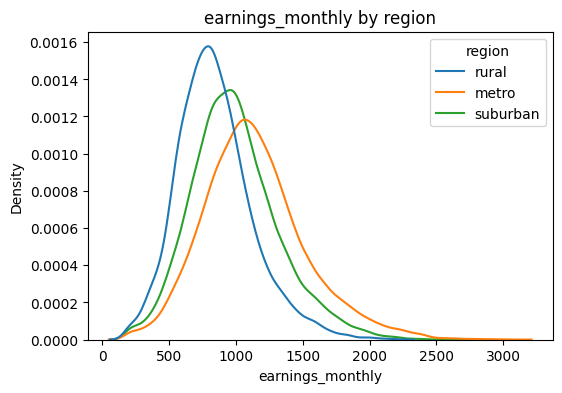

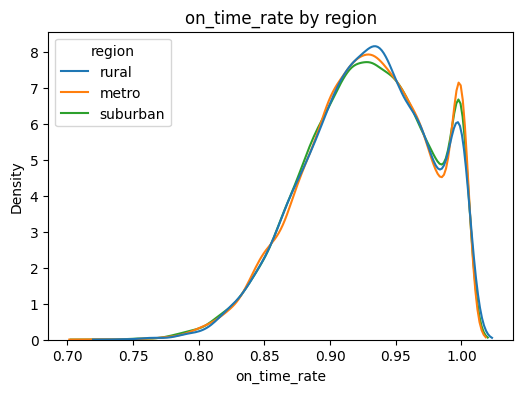

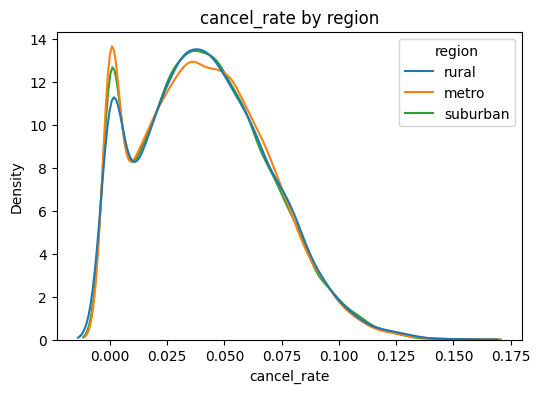

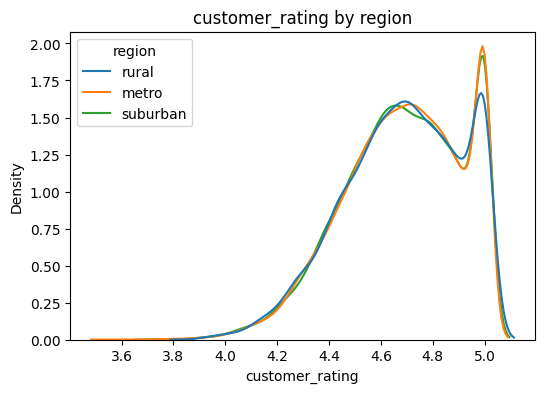

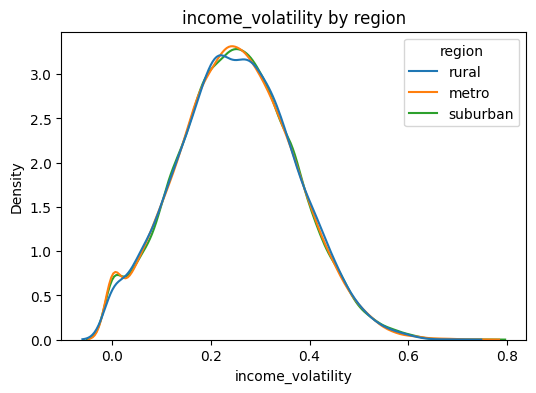

In [4]:
# Score proxy: use earnings and reliability features to visualize distributions across groups
features = ['earnings_monthly','on_time_rate','cancel_rate','customer_rating','income_volatility']
for col in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='region', common_norm=False)
    plt.title(f'{col} by region')
    plt.show()


In [5]:
# Group-wise outcome rates (potential bias proxy)
for attr in ['gender','region','role']:
    rates = df.groupby(attr)['defaulted_12m'].mean().sort_values()
    display(rates.to_frame(name='default_rate'))


,default_rate
gender,
nonbinary,0.076127
female,0.077898
male,0.078153


,default_rate
region,
metro,0.065185
suburban,0.084232
rural,0.105458


,default_rate
role,
merchant,0.072388
driver,0.080345


## After training: Load fairness report and inspect

In [ ]:
import json
import pandas as pd

fair_path = Path('../reports/fairness.json')
if fair_path.exists():
    fair = json.loads(fair_path.read_text())
    
    print('\n' + '='*80)
    print('                       FAIRNESS ANALYSIS REPORT')
    print('='*80 + '\n')
    
    # Summary table
    summary_data = []
    for attr in ['gender', 'region', 'role']:
        summary_data.append({
            'Attribute': attr.title(),
            'Overall Pos Rate': f"{fair[attr]['overall_pos_rate']:.4f}",
            'Demographic Parity Diff': f"{fair[attr]['demographic_parity_diff']:.4f}",
            'TPR Diff': f"{fair[attr]['tpr_diff']:.4f}",
            'FPR Diff': f"{fair[attr]['fpr_diff']:.4f}"
        })
    
    summary_df = pd.DataFrame(summary_data)
    print('OVERALL FAIRNESS METRICS SUMMARY:')
    print(summary_df.to_string(index=False))
    print('\n' + '-'*80 + '\n')
    
    # Detailed breakdown for each attribute
    for attr in ['gender', 'region', 'role']:
        print(f'📈 {attr.upper()} DETAILED BREAKDOWN:')
        print(f'\n  Overall positive rate: {fair[attr]["overall_pos_rate"]:.4f}')
        print(f'  Demographic parity difference: {fair[attr]["demographic_parity_diff"]:.4f}')
        
        # Group breakdown table
        group_data = []
        for group, stats in fair[attr]['groups'].items():
            group_data.append({
                'Group': group,
                'Count': stats['n'],
                'Avg Nova Score': f"{stats['avg_score']:.3f}",
                'Positive Rate': f"{stats['pos_rate']:.4f}",
                'TPR': f"{stats.get('tpr', 'N/A'):.4f}" if stats.get('tpr') is not None else 'N/A',
                'FPR': f"{stats.get('fpr', 'N/A'):.4f}" if stats.get('fpr') is not None else 'N/A'
            })
        
        group_df = pd.DataFrame(group_data)
        print('\n  Group Statistics:')
        print('  ' + group_df.to_string(index=False).replace('\n', '\n  '))
        print('\n' + '-'*80 + '\n')

    # Fairness assessment
    print('🎯 FAIRNESS ASSESSMENT:')
    max_demo_diff = max(abs(fair[attr]['demographic_parity_diff']) for attr in fair.keys())
    
    if max_demo_diff < 0.01:
        status = '✅ EXCELLENT'
        message = 'Very low bias detected across all demographics'
    elif max_demo_diff < 0.05:
        status = '✅ GOOD'
        message = 'Low bias detected, within acceptable thresholds'
    else:
        status = '⚠️  WARNING'
        message = 'Significant bias detected, mitigation recommended'
    
    print(f'Status: {status}')
    print(f'Assessment: {message}')
    print(f'Maximum demographic parity difference: {max_demo_diff:.4f}')
    
    print('\n' + '='*80)
    print('Note: Demographic parity differences < 0.05 are generally considered acceptable.')
    print('TPR = True Positive Rate, FPR = False Positive Rate')
    print('='*80)

else:
    print('⚠️  Fairness report not found. Run train_model.py first to generate fairness.json')